In [27]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os.path
import random

import tensorflow as tf
import tensorflow.keras as keras

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage import exposure, filters, io, morphology, transform
from tensorflow.keras import layers, models, optimizers

In [46]:
# set the path to the dataset and the path to the images folder
path = 'C:\\Users\\Natanael\\.cache\\kagglehub\\datasets\\alessiocorrado99\\animals10\\versions\\2'
path = path + '\\raw-img'
# path = Path(path)
path

'C:\\Users\\Natanael\\.cache\\kagglehub\\datasets\\alessiocorrado99\\animals10\\versions\\2\\raw-img'

In [17]:
# https://www.kaggle.com/code/vencerlanz09/animal-image-classification-using-efficientnetb7?scriptVersionId=125017960&cellId=11

def convert_path_to_df(dataset):
    """
    Convert image paths to a DataFrame

    Args:
        dataset: str, path to the dataset

    Returns:
        image_df: DataFrame, contains filepaths and labels

    """
    image_dir = Path(dataset)

    # Get filepaths and labels
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

image_df = convert_path_to_df(path)

In [47]:
# Check for corrupted images within the dataset
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(path).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
print("Done")

Done


Label
ragno         5143
cane          4863
gallina       3098
cavallo       2623
farfalla      2534
pecora        2196
gatto         2108
mucca         1866
scoiattolo    1862
elefante      1805
Name: count, dtype: int64

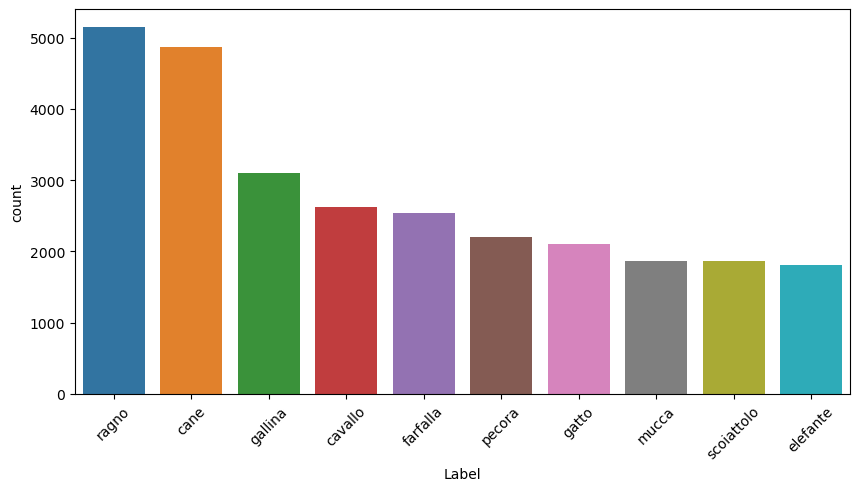

In [60]:
# Display the number of images per class
display(image_df.value_counts('Label'))

labels = image_df['Label'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=labels.index, y=labels, hue=labels.index )
plt.xticks(rotation=45)
plt.show()

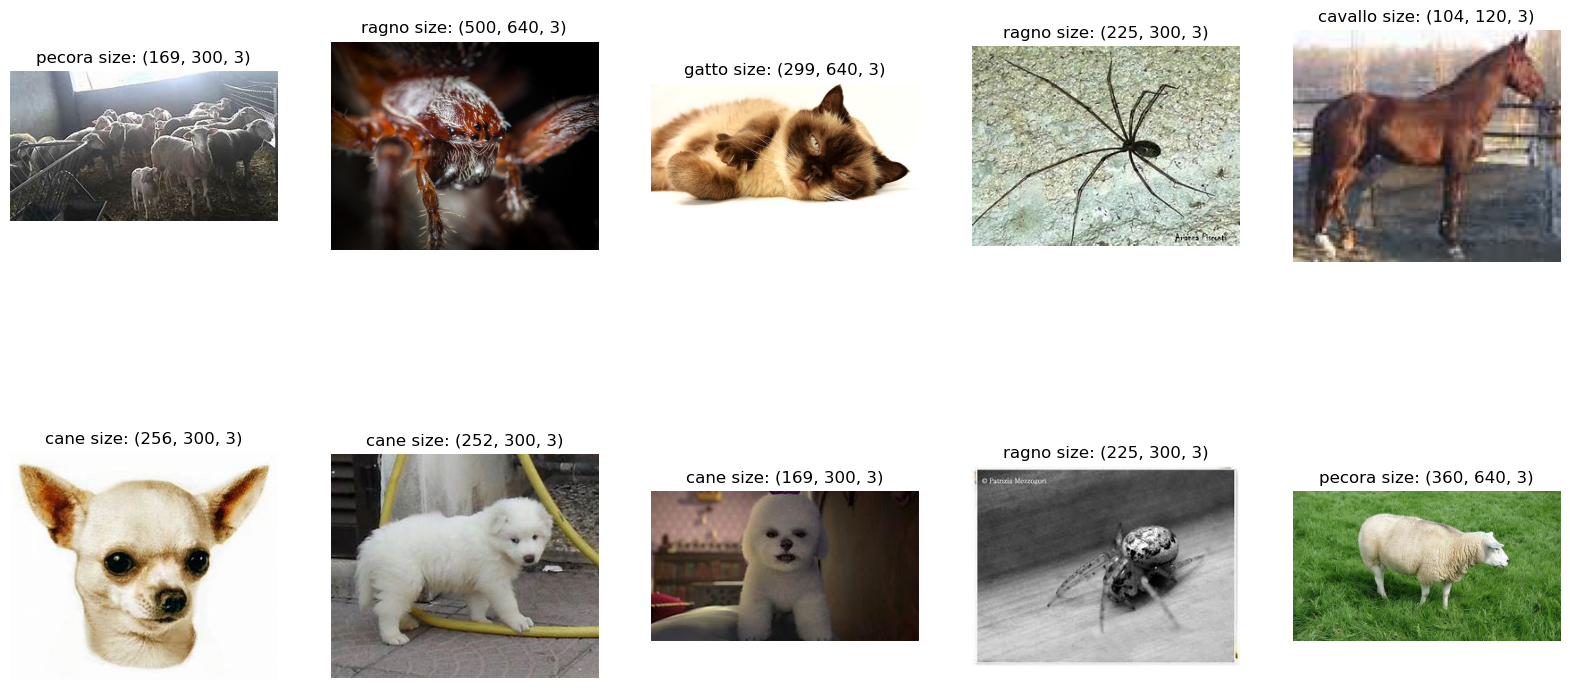

In [38]:
#  open 10 random images in image_df, with path in column 'Filepath', with respective labels and sizes
random.seed(42)
random_range = random.sample(range(0, len(image_df)), 10)
plt.figure(figsize=(20, 10))
for i in random_range:
    plt.subplot(2, 5, random_range.index(i)+1)
    img = io.imread(image_df['Filepath'][i])
    plt.title(f"{image_df['Label'][i]} size: {img.shape}")
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [ ]:
# look for the smallest, largest, and average image in the dataset
min_shape = (np.inf, np.inf)
max_shape = (0, 0)
total_shape = (0, 0)
for i in range(len(image_df)):
    img = io.imread(image_df['Filepath'][i])
    if img.shape[0] < min_shape[0]:
        min_shape = img.shape
    if img.shape[0] > max_shape[0]:
        max_shape = img.shape

print(f"Smallest image shape: {min_shape}")
print(f"Largest image shape: {max_shape}")


Smallest image shape: (57, 60, 3)
Largest image shape: (6000, 3798, 3)


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'